In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import pandas as pd
import numpy as np  
from scipy.stats import rankdata
from scipy import stats
import sys

## Ranking across experiments

Load the time/pulsed experiments

In [31]:
# time_fast_decay_df = pd.read_csv('../dataframes/fast_decay_time_ranking.csv') # this isn't super relevant - we're not using it
time_medium_decay_df = pd.read_csv('../dataframes/medium_decay_time_ranking.csv')
time_slow_decay_df = pd.read_csv('../dataframes/slow_decay_time_ranking.csv')
print(time_medium_decay_df.shape)
time_medium_decay_df.head()

(23, 6)


,Unnamed: 0,intervention_name,algorithm,decay,total_cell_count,cell_count_rank
0,EG_Ceramide_S1P_1_2,Ceramide->S1P=1,EG,2,199347.000000,9.0
1,EG_GAP_RAS_1_2,GAP->RAS=1,EG,2,652774.666667,22.0
2,EG_IL15_GAP_0_2,IL15->GAP=0,EG,2,667846.000000,23.0
3,EG_IL2RBT_IL2RB_0_2,IL2RBT->IL2RB=0,EG,2,633734.666667,19.0
4,EG_IL2RB_MCL1_0_2,IL2RB->MCL1=0,EG,2,609459.333333,17.0


Load the spatial experiment

In [34]:
space_cell_measure_ranking_df = pd.read_csv('../dataframes/spatial_cell_measures_rankings.csv')
print(space_cell_measure_ranking_df.shape)
space_cell_measure_ranking_df.head()

(23, 11)


,Unnamed: 0,Max cell count,Time at max cell count,Final cell count,Time to 75% population,Time at max cell count rank,Final cell count rank,Time to 75% population rank,steady_state_cell_count,Steady state cell count rank,cell_count_rank
0,EG_Ceramide_S1P_1_11,1367,264.0,885,672.0,19.5,20.5,15.0,106632.0,20.0,20.0
1,EG_GAP_RAS_1_11,1373,300.0,884,888.0,21.5,19.0,22.0,107269.0,23.0,23.0
2,EG_IL15_GAP_0_11,1398,444.0,887,948.0,23.0,23.0,23.0,106486.0,19.0,19.0
3,EG_IL2RBT_IL2RB_0_11,1360,156.0,873,588.0,12.0,3.5,12.0,105573.0,9.0,9.0
4,EG_IL2RB_MCL1_0_11,1362,108.0,880,540.0,10.5,12.5,11.0,105554.0,7.0,7.0


Load the time and spatial experiment

In [35]:
time_fast_clearance_df = pd.read_csv('../dataframes/fast_clearance_time_ranking.csv')
time_medium_clearance_df = pd.read_csv('../dataframes/medium_clearance_time_ranking.csv')
time_slow_clearnce_df = pd.read_csv('../dataframes/slow_clearance_time_ranking.csv')

time_fast_clearance_df.head()

,Unnamed: 0,intervention_name,algorithm,decay,steady_state_cell_count,AUC,cell_count_rank
0,EG_Ceramide_S1P_1_1,Ceramide->S1P=1,EG,1,389074.0,801.5,11.0
1,EG_GAP_RAS_1_1,GAP->RAS=1,EG,1,413721.0,851.5,19.0
2,EG_IL15_GAP_0_1,IL15->GAP=0,EG,1,415546.0,853.0,22.0
3,EG_IL2RBT_IL2RB_0_1,IL2RBT->IL2RB=0,EG,1,408738.0,851.5,17.0
4,EG_IL2RB_MCL1_0_1,IL2RB->MCL1=0,EG,1,415363.0,864.5,21.0


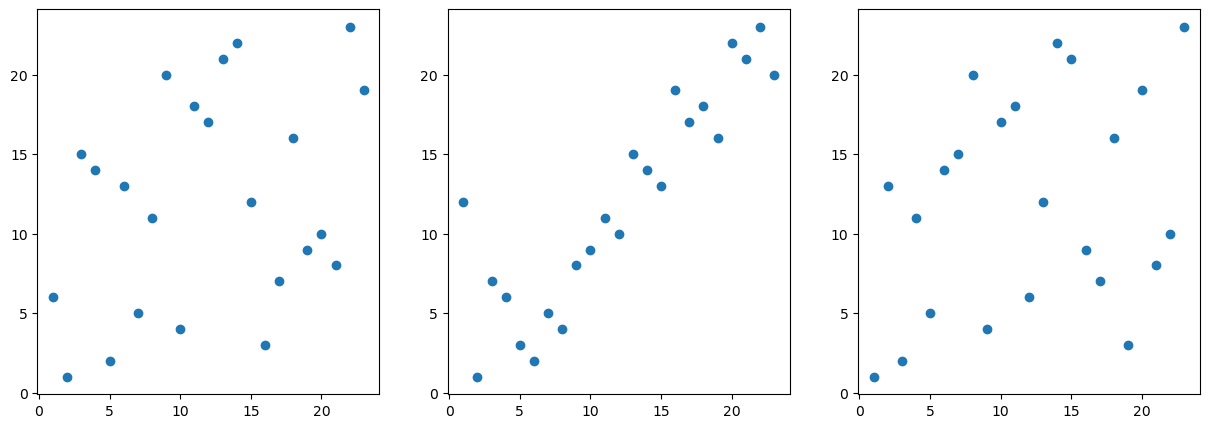

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].scatter(time_medium_decay_df['cell_count_rank'], space_cell_measure_ranking_df['cell_count_rank'])
# ax[0].set_title('Medium Decay Time vs. Final Cell Count')
ax[1].scatter(time_medium_decay_df['cell_count_rank'], time_medium_clearance_df['cell_count_rank'])

ax[2].scatter(time_medium_clearance_df['cell_count_rank'], space_cell_measure_ranking_df['cell_count_rank'])
# plt.savefig('../figures/cell_count_rank_comparison.png')